5BIM 

Alban FLOCON et Léanne CARPENTIER

# Calcul haute performance
### TP1 - OpenMP

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Partie I: Computing PI

Le but de cette première partie est de calculer la valeur de pi à l'aide d'un unique code, parallélisé selon 4 techniques différentes. Ensuite, nous évalurons les performances de chaque méthode pour différents nombres d'itérations (1000000, 100000000, 10000000000 et
1000000000000) et pour différents nombre de coeurs (1, 2, 4 et 8). Finalement, nous expliquerons et comparerons les performances obtenues.

Tout d'abord, nous testons le code fourni en séquentiel avec N=1000000 itérations et C=1 coeur. Si on souhaite faire tourner ce code pour un nombre d'itérations beaucoup plus grand (10^12 par exemple), cela prend beaucoup de temps (supérieur à 1h). C'est pourquoi la parallélisation de ce calcul de pi devient intéressante. Nous ferons tout de même attention à garder des résultats cohérents, les plus grands nombres d'itérations pourraient atteindre les limites d'arrondi de la machine.

In [2]:
!g++ tp_openmp_part_1_pi.cpp -o part1

In [4]:
!./part1 -N 10000000 -C 8

  User num_steps is 10000000

 pi with 10000000 steps is 3.141593 in 0.109751 seconds
 

***Question 1.1***

Le fichier tp1_part_1_pi_critical.cpp contient le code fourni auquel nous avons ajouté la méthode critical. 
Celle-ci permet de s'assurer que le bout de code désigné n'aura pas de concurence au moment de l'éxecution.
Au sein du code, la variable *x* est définie comme private, elle est calculée en parallèle. La variable *sum* est quant à elle définie comme shared, elle est calculée en séquentielle car partagée pour toutes les itérations.

Pour cette première méthode, nous avons relevé une ambiguité dans la dénomination des variables: nous avons appelé le nombre d'itérations *time_step* au lieu de *num_step*. Cette erreur sera corrigée dans les questions suivantes.

Nous stockons les temps de calcul pour chaque combinaison nombre d'itérations/nombre de coeurs dans le fichier performance_critical.csv. Nous effectuons 10 réplicats pour chaque combinaison. Le tableau final contient donc 160 lignes.

In [5]:
import csv
headers = ['num_threads', 'time_step', 'time', 'pi']

filename = 'performance_critical.csv'
with open(filename, 'w', newline='') as csvfile:
    csvwriter=csv.writer(csvfile)
    csvwriter.writerow(headers)

In [25]:
import subprocess

core = [1,2,4,8]
steps= [1000000, 100000000, 10000000000,1000000000000]

for c in core:
    for s in steps:
        for i in range(10):
            subprocess.run(['g++','-fopenmp','tp1_part_1_pi_critical.cpp', '-o', 'part1_critical'])
            subprocess.run(['./part1_critical', '-N', str(s) , '-C', str(c) ])

pi with 1000000 steps is 3.141593 in 0.012508 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.012623 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.012631 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.013015 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.012873 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.012645 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.012679 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.012801 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.012872 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.012806 seconds with 1 core 
 pi with 100000000 steps is 3.141593 in 1.258252 seconds with 1 core 
 pi with 100000000 steps is 3.141593 in 1.257444 seconds with 1 core 
 pi with 100000000 steps is 3.141593 in 1.254453 seconds with 1 core 
 pi with 100000000 steps is 3.141593 in 1.257533 seconds with 1 core 
 pi with 100000000 steps is 3.141593 in 1

 pi with 1000000000000 steps is 0.000000 in 0.000080 seconds with 4 core 
 pi with 1000000000000 steps is 0.000000 in 0.000155 seconds with 4 core 
 pi with 1000000000000 steps is 0.000000 in 0.000087 seconds with 4 core 
 pi with 1000000000000 steps is 0.000000 in 0.000097 seconds with 4 core 
 pi with 1000000 steps is 3.141593 in 0.092836 seconds with 8 core 
 pi with 1000000 steps is 3.141593 in 0.081576 seconds with 8 core 
 pi with 1000000 steps is 3.141593 in 0.080075 seconds with 8 core 
 pi with 1000000 steps is 3.141593 in 0.093256 seconds with 8 core 
 pi with 1000000 steps is 3.141593 in 0.097604 seconds with 8 core 
 pi with 1000000 steps is 3.141593 in 0.087800 seconds with 8 core 
 pi with 1000000 steps is 3.141593 in 0.096604 seconds with 8 core 
 pi with 1000000 steps is 3.141593 in 0.070958 seconds with 8 core 
 pi with 1000000 steps is 3.141593 in 0.075485 seconds with 8 core 
 pi with 1000000 steps is 3.141593 in 0.080197 seconds with 8 core 
 pi with 100000000 steps

Pour certaines combinaisons nombre d'itérations/nombre de coeurs, nous remarquons que le code plante et que pi n'atteint pas sa valeur de 3.1415899999999999. Cela concerne toutes les combinaisons avec 10000000000 et 1000000000000 itérations. En effet, les incrémentations permettant de calculer la valeur de pi sont si petites qu'une limite d'arrondi est atteinte. Dans le cadre de ce TP nous nous intéressons à la parallélisation , et bien que nous ayons conscience des problèmes que cela causerait dans un contexte professionnel, nous faisons abstraction de ces résultats aberrants.

***Question 1.2***

Le fichier tp1_part_1_pi_atomic.cpp contient le code fourni auquel nous avons ajouté la méthode atomic. Le mode d'action de cette méthode est similaire à celui de la méthode critical. Toutefois, il faut veiller à ce que l'action à paralléliser concerne bien une variable scalaire.

De la même manière, nous stockons les données de performances dans un fichier performance_atomic.csv.

In [1]:
import csv
headers = ['num_threads', 'num_step', 'time', 'pi']

filename = 'performance_atomic.csv'
with open(filename, 'w', newline='') as csvfile:
    csvwriter=csv.writer(csvfile)
    csvwriter.writerow(headers)

In [2]:
import subprocess

core = [1,2,4,8]
steps= [1000000, 100000000, 10000000000]

for c in core:
    for s in steps:
        for i in range(10):
            subprocess.run(['g++','-fopenmp','tp1_part_1_pi_atomic.cpp', '-o', 'part1_atomic'])
            subprocess.run(['./part1_atomic', '-N', str(s) , '-C', str(c) ])

pi with 1000000 steps is 3.141593 in 0.013925 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.015941 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.012623 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.016087 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.014807 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.015556 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.015029 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.016499 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.014381 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.016226 seconds with 1 core 
 pi with 100000000 steps is 3.141593 in 1.243456 seconds with 1 core 
 pi with 100000000 steps is 3.141593 in 1.249454 seconds with 1 core 
 pi with 100000000 steps is 3.141593 in 1.245812 seconds with 1 core 
 pi with 100000000 steps is 3.141593 in 1.275609 seconds with 1 core 
 pi with 100000000 steps is 3.141593 in 1

 pi with 10000000000 steps is 0.560332 in 186.989856 seconds with 8 core 
 pi with 10000000000 steps is 0.560332 in 205.068249 seconds with 8 core 
 pi with 10000000000 steps is 0.560332 in 198.915997 seconds with 8 core 
 

***Question 1.3***

Le fichier tp1_part_1_pi_reduction.cpp contient le code fourni auquel nous avons ajouté la méthode reduction. Contrairement aux 2 méthodes précédentes, au lieu de modifier une unique case mémoire, (c'est-à-dire attendre que la modification précédente soit terminée pour entammer la prochaine), on crée un arbre de réduction. Le calcul de *sum*, qui est bien une variable scalaire, n'est plus effectué en séquentiel. *x* reste private.

Nous stockons les données de performances dans un fichier performance_reduction.csv.

In [3]:
import csv
headers = ['num_threads', 'num_step', 'time', 'pi']

filename = 'performance_reduction.csv'
with open(filename, 'w', newline='') as csvfile:
    csvwriter=csv.writer(csvfile)
    csvwriter.writerow(headers)

In [4]:
import subprocess

core = [1,2,4,8]
steps= [1000000, 100000000, 10000000000]

for c in core:
    for s in steps:
        for i in range(10):
            subprocess.run(['g++','-fopenmp','tp1_part_1_pi_reduction.cpp', '-o', 'part1_reduction'])
            subprocess.run(['./part1_reduction', '-N', str(s) , '-C', str(c) ])

pi with 1000000 steps is 3.141593 in 0.015918 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.012824 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.015128 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.012518 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.013822 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.013718 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.014259 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.014181 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.012879 seconds with 1 core 
 pi with 1000000 steps is 3.141593 in 0.012804 seconds with 1 core 
 pi with 100000000 steps is 3.141593 in 1.242296 seconds with 1 core 
 pi with 100000000 steps is 3.141593 in 1.265252 seconds with 1 core 
 pi with 100000000 steps is 3.141593 in 1.244439 seconds with 1 core 
 pi with 100000000 steps is 3.141593 in 1.241438 seconds with 1 core 
 pi with 100000000 steps is 3.141593 in 1

 pi with 10000000000 steps is 0.560332 in 2.421955 seconds with 8 core 
 pi with 10000000000 steps is 0.560332 in 2.421098 seconds with 8 core 
 pi with 10000000000 steps is 0.560332 in 2.409271 seconds with 8 core 
 

***Question 1.4***

Le fichier tp1_part_1_pi_partial_sum.cpp contient le code fourni auquel nous avons ajouté la méthode "partial sum". 
Celle-ci consiste à créer manuellement notre propre arbre de réduction. En effet, dans une boucle parallélisée, nous créons un array dont la taille est égale au nombre d'itérations souhaité. Cet array est par la suite divisé en N=num_threads sections. De manière synchrone,chacun des thread est chargé du calcul d'une somme partielle de pi au sein d'une section associée. Nous laissons la somme globale sous la méthode atomic car pour la calculer il faut que chaque somme partielle ait été définie.

Nous stockons les temps de calcul pour chaque combinaison nombre d'itérations/nombre de coeurs dans le fichier performance_partial_sum.csv.


In [16]:
import csv
headers = ['num_threads', 'num_step', 'time', 'pi']

filename = 'performance_partial_sum.csv'
with open(filename, 'w', newline='') as csvfile:
    csvwriter=csv.writer(csvfile)
    csvwriter.writerow(headers)

In [17]:
import subprocess

core = [1,2,4,8]
steps= [1000000, 100000000]

for c in core:
    for s in steps:
        for i in range(10):
            subprocess.run(['g++','-fopenmp','tp1_part_1_pi_partial_sum.cpp', '-o', 'part1_partial_sum'])
            subprocess.run(['./part1_partial_sum', '-N', str(s) , '-C', str(c) ])

Thread number 0  and the number of threads 1 and we choose 1 cores 
 istart 0  and iend 1000000 
 pi with 1000000 steps is 3.141595 in 0.011061 seconds with 1 core 
 Thread number 0  and the number of threads 1 and we choose 1 cores 
 istart 0  and iend 1000000 
 pi with 1000000 steps is 3.141595 in 0.011184 seconds with 1 core 
 Thread number 0  and the number of threads 1 and we choose 1 cores 
 istart 0  and iend 1000000 
 pi with 1000000 steps is 3.141595 in 0.011182 seconds with 1 core 
 Thread number 0  and the number of threads 1 and we choose 1 cores 
 istart 0  and iend 1000000 
 pi with 1000000 steps is 3.141595 in 0.026366 seconds with 1 core 
 Thread number 0  and the number of threads 1 and we choose 1 cores 
 istart 0  and iend 1000000 
 pi with 1000000 steps is 3.141595 in 0.011233 seconds with 1 core 
 Thread number 0  and the number of threads 1 and we choose 1 cores 
 istart 0  and iend 1000000 
 pi with 1000000 steps is 3.141595 in 0.011296 seconds with 1 core 
 Thre

 Thread number 0  and the number of threads 2 and we choose 2 cores 
 istart 0  and iend 50000000 
 Thread number 1  and the number of threads 2 and we choose 2 cores 
 istart 50000000  and iend 100000000 
 pi with 100000000 steps is 3.141593 in 4.576070 seconds with 2 core 
 Thread number 0  and the number of threads 2 and we choose 2 cores 
 istart 0  and iend 50000000 
 Thread number 1  and the number of threads 2 and we choose 2 cores 
 istart 50000000  and iend 100000000 
 pi with 100000000 steps is 3.141593 in 4.507375 seconds with 2 core 
 Thread number 0  and the number of threads 4 and we choose 4 cores 
 istart 0  and iend 250000 
 Thread number 2  and the number of threads 4 and we choose 4 cores 
 istart 500000  and iend 750000 
 Thread number 1  and the number of threads 4 and we choose 4 cores 
 istart 250000  and iend 500000 
 Thread number 3  and the number of threads 4 and we choose 4 cores 
 istart 750000  and iend 1000000 
 pi with 1000000 steps is 3.141595 in 0.0675

 Thread number 0  and the number of threads 4 and we choose 4 cores 
 istart 0  and iend 25000000 
 Thread number 3  and the number of threads 4 and we choose 4 cores 
 istart 75000000  and iend 100000000 
 Thread number 1  and the number of threads 4 and we choose 4 cores 
 istart 25000000  and iend 50000000 
 Thread number 2  and the number of threads 4 and we choose 4 cores 
 istart 50000000  and iend 75000000 
 pi with 100000000 steps is 3.141593 in 6.027294 seconds with 4 core 
 Thread number 0  and the number of threads 4 and we choose 4 cores 
 istart 0  and iend 25000000 
 Thread number 1  and the number of threads 4 and we choose 4 cores 
 istart 25000000  and iend 50000000 
 Thread number 3  and the number of threads 4 and we choose 4 cores 
 istart 75000000  and iend 100000000 
 Thread number 2  and the number of threads 4 and we choose 4 cores 
 istart 50000000  and iend 75000000 
 pi with 100000000 steps is 3.141593 in 6.694589 seconds with 4 core 
 Thread number 0  and th

 Thread number 0  and the number of threads 8 and we choose 8 cores 
 istart 0  and iend 125000 
 Thread number 4  and the number of threads 8 and we choose 8 cores 
 istart 500000  and iend 625000 
 Thread number 7  and the number of threads 8 and we choose 8 cores 
 istart 875000  and iend 1000000 
 Thread number 3  and the number of threads 8 and we choose 8 cores 
 istart 375000  and iend 500000 
 Thread number 5  and the number of threads 8 and we choose 8 cores 
 istart 625000  and iend 750000 
 Thread number 1  and the number of threads 8 and we choose 8 cores 
 istart 125000  and iend 250000 
 Thread number 2  and the number of threads 8 and we choose 8 cores 
 istart 250000  and iend 375000 
 Thread number 6  and the number of threads 8 and we choose 8 cores 
 istart 750000  and iend 875000 
 pi with 1000000 steps is 3.141595 in 0.100648 seconds with 8 core 
 Thread number 0  and the number of threads 8 and we choose 8 cores 
 istart 0  and iend 125000 
 Thread number 7  and t

 Thread number 0  and the number of threads 8 and we choose 8 cores 
 istart 0  and iend 12500000 
 Thread number 7  and the number of threads 8 and we choose 8 cores 
 istart 87500000  and iend 100000000 
 Thread number 6  and the number of threads 8 and we choose 8 cores 
 istart 75000000  and iend 87500000 
 Thread number 3  and the number of threads 8 and we choose 8 cores 
 istart 37500000  and iend 50000000 
 Thread number 1  and the number of threads 8 and we choose 8 cores 
 istart 12500000  and iend 25000000 
 Thread number 4  and the number of threads 8 and we choose 8 cores 
 istart 50000000  and iend 62500000 
 Thread number 5  and the number of threads 8 and we choose 8 cores 
 istart 62500000  and iend 75000000 
 Thread number 2  and the number of threads 8 and we choose 8 cores 
 istart 25000000  and iend 37500000 
 pi with 100000000 steps is 3.141593 in 10.152600 seconds with 8 core 
 Thread number 4  and the number of threads 8 and we choose 8 cores 
 istart 50000000  

***Question 1.6***

Afin de faciliter représentations graphiques, nous importons dans des dataframes les données stockées dans les différents fichiers CSV. Nous faisons le choix d'utiliser la librairie matplolib. De plus, nous appliquons des échelles log aux nombres d'itérations pour améliorer la lisibilité des graphiques.

Dans un premier temps, nous représentons les résultats de la méthode critical. 

In [2]:
df_critical= pd.read_csv('./performance_critical.csv')
print(df_critical.shape)
df_critical[['time_step']]=np.log(df_critical[['time_step']].values)
df_critical=df_critical.loc[df_critical['time_step']<= np.log(100000000)] #pour s'affranchir des valeurs "aberrantes"

df_critical

(160, 4)


,num_threads,time_step,time,pi
0,1,13.815511,0.012508,3.14159
1,1,13.815511,0.012623,3.14159
2,1,13.815511,0.012631,3.14159
3,1,13.815511,0.013015,3.14159
4,1,13.815511,0.012873,3.14159
...,...,...,...,...
135,8,18.420681,9.404780,3.14159
136,8,18.420681,9.297570,3.14159
137,8,18.420681,8.909670,3.14159
138,8,18.420681,7.515450,3.14159


Text(0.5, 1.0, 'Performance de la méthode critical')

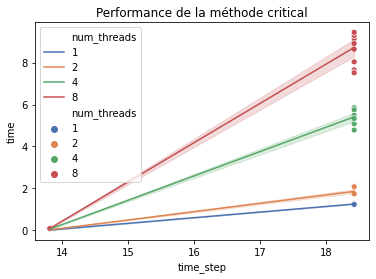

In [32]:
#ATTENTION ici time_step = num_step = nombre d'itérations

sns.scatterplot('time_step','time', data=df_critical, hue='num_threads',palette="deep")
sns.lineplot(data=df_critical, x="time_step", y="time", hue="num_threads",palette="deep")
plt.title('Performance de la méthode critical')

Dans un second temps, nous représentons les résultats de la méthode atomic. 

Text(0.5, 1.0, 'Performance de la méthode atomic')

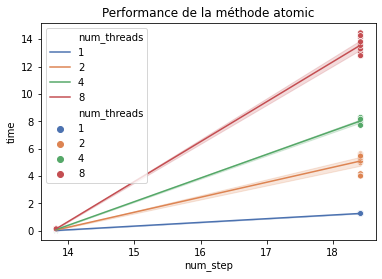

In [3]:
# On read les valeurs du csv, attention, on a testé que les 3 premiers pas de temps!!
df_atomic= pd.read_csv('./performance_atomic.csv')
# On met les time-step en logarithme
df_atomic[['num_step']]=np.log(df_atomic[['num_step']].values)
df_atomic=df_atomic.loc[df_atomic['num_step']<= np.log(100000000)] #pour s'affranchir des valeurs "aberrantes"


sns.scatterplot('num_step','time', data=df_atomic, hue='num_threads',palette="deep")
sns.lineplot(data=df_atomic, x="num_step", y="time", hue="num_threads",palette="deep")
plt.title('Performance de la méthode atomic')

Dans un troisième temps, nous représentons les résultats de la méthode réduction. 

Text(0.5, 1.0, 'Performance de la méthode réduction')

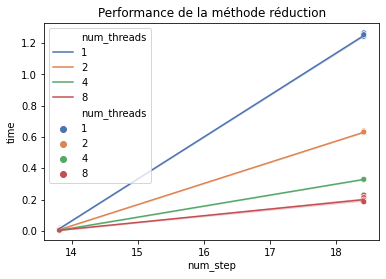

In [4]:
df_reduction= pd.read_csv('./performance_reduction.csv')
df_reduction[['num_step']]=np.log(df_reduction[['num_step']].values)
df_reduction=df_reduction.loc[df_reduction['num_step']<= np.log(100000000)] #pour s'affranchir des valeurs "aberrantes"


sns.scatterplot('num_step','time', data=df_reduction, hue='num_threads',palette="deep")
sns.lineplot(data=df_reduction, x="num_step", y="time", hue="num_threads",palette="deep")
plt.title('Performance de la méthode réduction')

Enfin, nous représentons les résultats de la méthode partial sum.

Text(0.5, 1.0, 'Performance de la méthode partial sum')

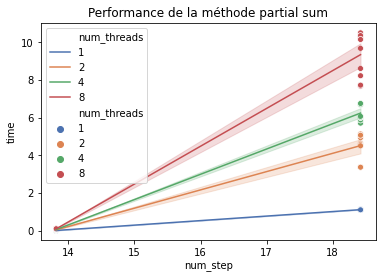

In [5]:
df_partial_sum= pd.read_csv('./performance_partial_sum.csv')
df_partial_sum[['num_step']]=np.log(df_partial_sum[['num_step']].values)
df_partial_sum=df_partial_sum.loc[df_partial_sum['num_step']<= np.log(100000000)] #pour s'affranchir des valeurs "aberrantes"


sns.scatterplot('num_step','time', data=df_partial_sum, hue='num_threads',palette="deep")
sns.lineplot(data=df_partial_sum, x="num_step", y="time", hue="num_threads",palette="deep")
plt.title('Performance de la méthode partial sum')

Ces 4 graphiques nous permettent d'expliquer les performances de chaque méthode de manière individuelle. Puisque nous devons être capable de comparer ces méthodes entre elles, nous décidons de tracer l'évolution des performances des 4 méthodes sur un unique graphique et pour un même nombre de coeur. Nous effectuons cela pour 1 coeur puis pour 8 coeurs. 

In [6]:
#puisqu'on a supprimé certaines lignes des dataframe, on remet à jour les numéros d'index
df_critical=df_critical.reset_index()
df_atomic=df_atomic.reset_index()
df_reduction=df_reduction.reset_index()


In [7]:
#on renomme la colonne time_step en num_step pour coincider avec les autres dataframe
df_critical.rename(columns={'time_step': 'num_step'}, inplace=True)

#on ajoute une colonne method à tous les dataframe
df_critical['method'] = pd.Series(['critical' for x in range(len(df_critical.index))]) # adding column with constant value
df_atomic['method'] = pd.Series(['atomic' for x in range(len(df_atomic.index))])
df_reduction['method'] = pd.Series(['reduction' for x in range(len(df_reduction.index))]) 
df_partial_sum['method'] = pd.Series(['partial sum' for x in range(len(df_partial_sum.index))]) 


Text(0.5, 1.0, 'Comparaison des 4 méthodes pour 1 coeur')

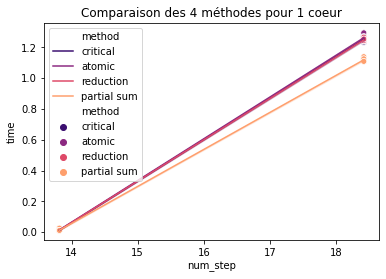

In [9]:
#on fusionne toutes les lignes des différents dataframe pour lesquelles on travaille avec 1 coeur
merged_df_1_core = df_critical.loc[(df_critical['num_threads']==1)] 
merged_df_1_core = merged_df_1_core.append(df_atomic.loc[(df_atomic['num_threads']==1)])
merged_df_1_core = merged_df_1_core.append(df_reduction.loc[(df_reduction['num_threads']==1)])
merged_df_1_core = merged_df_1_core.append(df_partial_sum.loc[(df_partial_sum['num_threads']==1)])
merged_df_1_core=merged_df_1_core.reset_index()
#merged_df_1_core


sns.scatterplot('num_step','time', data=merged_df_1_core, hue='method',palette="magma")
sns.lineplot(data=merged_df_1_core, x="num_step", y="time", hue="method",palette="magma")
plt.title('Comparaison des 4 méthodes pour 1 coeur')

Text(0.5, 1.0, 'Comparaison des 4 méthodes pour 8 coeurs')

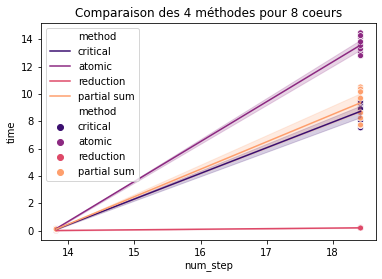

In [10]:
#on fusionne toutes les lignes des différents dataframe pour lesquelles on travaille avec 1 coeur
merged_df_8_core = df_critical.loc[(df_critical['num_threads']==8)] 
merged_df_8_core = merged_df_8_core.append(df_atomic.loc[(df_atomic['num_threads']==8)])
merged_df_8_core = merged_df_8_core.append(df_reduction.loc[(df_reduction['num_threads']==8)])
merged_df_8_core = merged_df_8_core.append(df_partial_sum.loc[(df_partial_sum['num_threads']==8)])
merged_df_8_core=merged_df_8_core.reset_index()

#merged_df_8_core


sns.scatterplot('num_step','time', data=merged_df_8_core, hue='method',palette="magma")
sns.lineplot(data=merged_df_8_core, x="num_step", y="time", hue="method",palette="magma")
plt.title('Comparaison des 4 méthodes pour 8 coeurs')

***Question 1.7***

Pour toutes les méthodes, et comme le veut la logique, le temps de calcul est plus court avec 1000000 itérations qu'avec 100000000 itérations, peu importe le nombre de coeurs.

A présent, expliquons et comparons les performances des méthodes utilisées.

* **Méthode critical:** 
Moins il y a de coeurs, plus le calcul est rapide en raison de la partie séquentielle du calcul. Contrairement à ce que nous pourrions penser intuitivement, du temps est "perdu" puisqu'une seule case mémoire est allouée au calcul de *sum*, tous les coeurs doivent se positionner en file d'attente pour accéder au calcul. 
Ainsi, la meilleure performance est observée pour la combinaison 1000000 itérations/1 coeur avec un temps de calcul moyen de 0,0127453 secondes. 

* **Méthode atomic:** 
Moins il y a de coeurs, plus le calcul est rapide en raison de la partie séquentielle du calcul. Contrairement à ce que nous pourrions penser intuitivement, du temps est "perdu" puisqu'une seule case mémoire est allouée au calcul de *sum*, tous les coeurs doivent se positionner en file d'attente pour accéder au calcul. 
Ainsi, la meilleure performance est observée pour la combinaison 1000000 itérations/1 coeur avec un temps de calcul moyen de 1.51074 secondes. 

* **Méthode reduction:** 
Plus il y a de coeurs, plus le calcul est rapide puisque cette fois-ci toutes les actions sont effectuées en parallèle: on "gagne" du temps. Ici, on réalise bien l'intéret de disposer de plusieurs coeurs pour la parallélisation.
Ainsi, la meilleure performance est observée pour la combinaison 1000000 itérations/8 coeurs avec un temps de calcul moyen de 0,003479 secondes. 


* **Méthode partial sum:** 
Moins il y a de coeurs, plus le calcul est rapide en raison de la partie séquentielle du calcul. En effet, bien qu'on ait créée manuellement un arbre de réduction, ce code contient toujours une méthode pragma atomic.
Ainsi, la meilleure performance est observée pour la combinaison 1000000 itérations/1 coeur avec un temps de calcul moyen de 0.0127474 secondes. 

En n'utilisant qu'1 seul coeur, les 4 méthodes que nous avons essayé donnent des résultats assez similaires. En effet, les méthodes critical, atomic et reduction étant des techniques de parallélisation, elles ne peuvent pas témoigner de leur efficacité, ni se distinguer entre elles s'il n'y a qu'1 seule unité de calcul disponible. La méthode sum partial est legèrement plus performantes que ses trois concurrente. Notre hypothèse est la suivante: la méthode partial sum étant codée "manuellement", les instructions que nous fournissons guident la machine dans l'éxécution des calculs. Dans les méthodes critical, atomic et reduction, la machine prend un petit peu plus de temps pour déchiffrer les directives OpenMP.

Par ailleurs, en utilisant 8 coeurs, la méthode réduction est de loin la plus efficace. Le code de cette méthode est entièrement paraléllisé, ce qui permet d'illustrer clairement l'intéret de ce TP openMP: le calcul parallèle offre un gain de temps de calcul considérable. En revanche, nous n'expliquons pas pourquoi la méthode critical est ici plus performante que la méthode atomic. Or, la méthode critical étant plus fexible (prend tout type de variable et non pas seulement des scalaires), le coüt de calcul devrait être plus important.

## Partie II: Matrix vector operation

Dans cette seconde partie, le but est d'effectuer des opérations entre une matrice A de taille 2^Nx2^M et deux vecteurs lignes x et y dont les tailles respectives sont 2^M et 2^N. L'algorithme doit être développé selon 3 méthodes différentes: séquentielle, OpenMP pragma et SIMD. Nous effectuerons les calculs pour 7 combinaisons de valeurs 2^Mx2^N et pour différents nombre de coeurs (1, 2, 4 et 8). Finalement, nous expliquerons et comparerons les performances obtenues.
on a reussi

In [10]:
!g++ tp_openmp_part_2_vector.cpp -o part2_seq

In [11]:
!./part2_seq -N 2 -M 1 -C 1

  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 7e-06 s ) bandwidth( 0.16 GB/s )


***Question 2.1***

Le fichier tp1_openmp_part_2_vector.cpp contient le code fourni que nous avons complété afin de suivre les opérations entre A, x et y décrites dans les consignes de ce TP. Ce code est construit en séquentiel. A l'image du travail effectué dans la partie 1, nous stockons les données de performances dans le fichier performance_part_2_seq.csv, puis les transférons dans un dataframe pour faciliter leur manipulation. Par ailleurs, dans les dataframes de cette partie, il y a une ambiguité dans le noms des colonnes : M désigne le nombre total de colonnes dans la matrice A (2^M) et N désigne le nombre total de ligne dans la matrice A (2^N).

In [19]:
import csv

headers = ['num_threads', 'N', 'M', 'result','time']

filename = 'performance_part2_seq.csv'
with open(filename, 'w', newline='') as csvfile:
    csvwriter=csv.writer(csvfile)
    csvwriter.writerow(headers)

In [20]:
import subprocess

core = [1,2,4,8]
N= [2,4,8,10,12,14]
#M=[1,3,7,9,11,13,15]

for c in core:
    for n in N:
        for i in range(10):
            subprocess.run(['g++','tp_openmp_part_2_vector.cpp', '-o', 'part2_seq'])
            subprocess.run(['./part2_seq', '-N', str(n) ,'-M',str(n-1), '-C', str(c) ])
        

  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 4e-06 s ) bandwidth( 0.28 GB/s )
  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 4e-06 s ) bandwidth( 0.28 GB/s )
  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 1.1e-05 s ) bandwidth( 0.101818 GB/s )
  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 3e-06 s ) bandwidth( 0.373333 GB/s )
  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 4e-06 s ) bandwidth( 0.28 GB/s )
  User N is 4
  User M is 2
  

  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result for 1024 x 512 is 524288.000000
  N( 1024 ) M( 512 ) nrepeat ( 10 ) problem( 4.20659 MB ) time( 0.018298 s ) bandwidth( 2.29894 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.294283 s ) bandwidth( 2.28209 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.292097 s ) bandwidth( 2.29917 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.299068 s ) bandwidth( 2.24558 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048


  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 1e-05 s ) bandwidth( 1.216 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 7e-06 s ) bandwidth( 1.73714 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 9e-06 s ) bandwidth( 1.35111 GB/s )
  User N is 256
  User M is 128
  Total size S = 32768 N = 256 M = 128
  Computed result for 256 x 128 is 32768.000000
  N( 256 ) M( 128 ) nrepeat ( 10 ) problem( 0.265216 MB ) time( 0.001132 s ) bandwidth( 2.3429 GB/s )
  User N is 256
  User M is 128
  Total size S = 32768 N = 256 M = 128
  Computed result for 256 x 128 is 32768.000000
  N( 256 ) M( 128 ) nrepeat ( 10 ) problem( 0.265216 

  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 4.5862 s ) bandwidth( 2.34167 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 4.5904 s ) bandwidth( 2.33953 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 4.58472 s ) bandwidth( 2.34243 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 4.5962 s ) bandwidth( 2.33658 GB/s )
  User N is 16384
  User M is 8192
  Total 

  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result for 1024 x 512 is 524288.000000
  N( 1024 ) M( 512 ) nrepeat ( 10 ) problem( 4.20659 MB ) time( 0.017955 s ) bandwidth( 2.34285 GB/s )
  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result for 1024 x 512 is 524288.000000
  N( 1024 ) M( 512 ) nrepeat ( 10 ) problem( 4.20659 MB ) time( 0.018525 s ) bandwidth( 2.27076 GB/s )
  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result for 1024 x 512 is 524288.000000
  N( 1024 ) M( 512 ) nrepeat ( 10 ) problem( 4.20659 MB ) time( 0.018891 s ) bandwidth( 2.22677 GB/s )
  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result for 1024 x 512 is 524288.000000
  N( 1024 ) M( 512 ) nrepeat ( 10 ) problem( 4.20659 MB ) time( 0.018137 s ) bandwidth( 2.31934 GB/s )
  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result 

  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 1e-05 s ) bandwidth( 1.216 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 1e-05 s ) bandwidth( 1.216 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 2e-05 s ) bandwidth( 0.608 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 1.1e-05 s ) bandwidth( 1.10545 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 8e-06 s ) bandwidth( 1.52

  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.286711 s ) bandwidth( 2.34236 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.287408 s ) bandwidth( 2.33668 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 4.61034 s ) bandwidth( 2.32941 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 4.60056 s ) bandwidth( 2.33436 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 1342

In [11]:
df_part2_seq= pd.read_csv('./performance_part2_seq.csv')
print(df_part2_seq.shape)
df_part2_seq.head()

(240, 5)


,num_threads,N,M,result,time
0,1,4,2,0,0.000004
1,1,4,2,0,0.000004
2,1,4,2,0,0.000011
3,1,4,2,0,0.000003
4,1,4,2,0,0.000004


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Performance du code séquentiel')

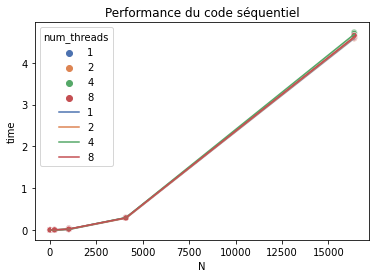

In [101]:
sns.scatterplot('N','time', data=df_part2_seq, hue='num_threads',palette="deep")
sns.lineplot(data=df_part2_seq, x="N", y="time", hue="num_threads",palette="deep")
plt.title('Performance du code séquentiel')

Comme nous l'avions prévu, le nombre de coeurs n'a pas d'impact sur le temps de calcul lorsque le méthode séquentielle est utilisée. De plus, et en toute logique, le temps de calcul augmente lorsque la valeur de N (et par conséquent de M) augmente. 

***Question 2.5***

Le fichier tp1_openmp_part_2_vector_pragma.cpp contient le code utilisé dans la question précèdente, que nous avonc complété avec une méthode pragma réduction. Nous avons choisi cette dernière car elle a montré les meilleurs résultats dans la première partie de ce TP, et parce qu'il était cohérent/possible de l'appliquer à l'algorithme de cette seconde partie. Les données de performances dans le fichier performance_part_2_pragma.csv

In [28]:
import csv

headers = ['num_threads', 'N', 'M', 'result','time']

filename = 'performance_part2_pragma.csv'
with open(filename, 'w', newline='') as csvfile:
    csvwriter=csv.writer(csvfile)
    csvwriter.writerow(headers)

In [29]:
import subprocess

core = [1,2,4,8]
N= [2,4,8,10,12,14]
#M=[1,3,7,9,11,13,15]

for c in core:
    for n in N:
        for i in range(10):
            subprocess.run(['g++','-fopenmp','tp_openmp_part_2_vector_pragma.cpp', '-o', 'part2_pragma'])
            subprocess.run(['./part2_pragma', '-N', str(n) ,'-M',str(n-1), '-C', str(c) ])
        

  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 1.9e-05 s ) bandwidth( 0.0589474 GB/s )
  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 1.7e-05 s ) bandwidth( 0.0658824 GB/s )
  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 2e-05 s ) bandwidth( 0.056 GB/s )
  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 1.9e-05 s ) bandwidth( 0.0589474 GB/s )
  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 1.8e-05 s ) bandwidth( 0.0622222 GB/s )
  User N is

  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result for 1024 x 512 is 524288.000000
  N( 1024 ) M( 512 ) nrepeat ( 10 ) problem( 4.20659 MB ) time( 0.027199 s ) bandwidth( 1.5466 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.414024 s ) bandwidth( 1.62208 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.40016 s ) bandwidth( 1.67828 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.401887 s ) bandwidth( 1.67107 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  

  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 7.2e-05 s ) bandwidth( 0.168889 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 7.7e-05 s ) bandwidth( 0.157922 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 9.7e-05 s ) bandwidth( 0.125361 GB/s )
  User N is 256
  User M is 128
  Total size S = 32768 N = 256 M = 128
  Computed result for 256 x 128 is 32768.000000
  N( 256 ) M( 128 ) nrepeat ( 10 ) problem( 0.265216 MB ) time( 0.001599 s ) bandwidth( 1.65864 GB/s )
  User N is 256
  User M is 128
  Total size S = 32768 N = 256 M = 128
  Computed result for 256 x 128 is 32768.000000
  N( 256 ) M( 128 ) nrepeat ( 10 ) proble

  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 3.2834 s ) bandwidth( 3.27082 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 3.28836 s ) bandwidth( 3.26588 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 3.3 s ) bandwidth( 3.25436 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 3.25738 s ) bandwidth( 3.29694 GB/s )
  User N is 16384
  User M is 8192
  Total si

  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result for 1024 x 512 is 524288.000000
  N( 1024 ) M( 512 ) nrepeat ( 10 ) problem( 4.20659 MB ) time( 0.008624 s ) bandwidth( 4.87777 GB/s )
  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result for 1024 x 512 is 524288.000000
  N( 1024 ) M( 512 ) nrepeat ( 10 ) problem( 4.20659 MB ) time( 0.007686 s ) bandwidth( 5.47306 GB/s )
  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result for 1024 x 512 is 524288.000000
  N( 1024 ) M( 512 ) nrepeat ( 10 ) problem( 4.20659 MB ) time( 0.009759 s ) bandwidth( 4.31047 GB/s )
  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result for 1024 x 512 is 524288.000000
  N( 1024 ) M( 512 ) nrepeat ( 10 ) problem( 4.20659 MB ) time( 0.009167 s ) bandwidth( 4.58884 GB/s )
  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result 

  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 0.000172 s ) bandwidth( 0.0706977 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 0.000572 s ) bandwidth( 0.0212587 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 0.000794 s ) bandwidth( 0.0153149 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 0.001062 s ) bandwidth( 0.0114501 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 0

  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.116181 s ) bandwidth( 5.78046 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.10199 s ) bandwidth( 6.58476 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.101927 s ) bandwidth( 6.58883 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 1.66716 s ) bandwidth( 6.44171 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 134217728 N =

In [12]:
df_part2_pragma= pd.read_csv('./performance_part2_pragma.csv')
print(df_part2_pragma.shape)
df_part2_pragma.head()

(240, 5)


,num_threads,N,M,result,time
0,1,4,2,0,0.000019
1,1,4,2,0,0.000017
2,1,4,2,0,0.000020
3,1,4,2,0,0.000019
4,1,4,2,0,0.000018


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Performance du code pragma reduction')

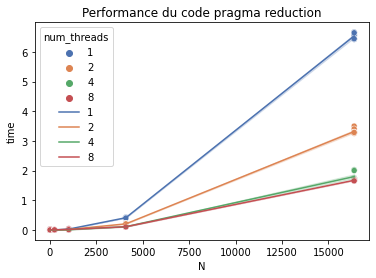

In [103]:
sns.scatterplot('N','time', data=df_part2_pragma, hue='num_threads',palette="deep")
sns.lineplot(data=df_part2_pragma, x="N", y="time", hue="num_threads",palette="deep")
plt.title('Performance du code pragma reduction')

Comme expliqué dans la première partie de ce TP, la méthode pragma réduction gagne en efficacité lorsque le nombre de coeurs augmente. 

***Question 2.9***

Le fichier tp1_openmp_part_2_vector_simd.cpp contient le code que nous avons complété avec une méthode simd. A partir des commandes Openpragma classiques, la méthode SIMD dicte au compilateur l'execution vectorielle de la boucle ci-après. Ainsi il participe à une vectorisation automatique "forcée" du code, il faut donc faire attention aux erreurs mémoires et aux résultats incorrects qui peuvent en résulter. Nous veillerons à étudier les performances. Ces dernières sont dans le fichier performance_part_2_simd.csv.

In [95]:
import csv

headers = ['num_threads', 'N', 'M', 'result','time']

filename = 'performance_part2_simd.csv'
with open(filename, 'w', newline='') as csvfile:
    csvwriter=csv.writer(csvfile)
    csvwriter.writerow(headers)

In [96]:
import subprocess

core = [1,2,4,8]
N= [2,4,8,10,12,14]
#M=[1,3,7,9,11,13,15]

for c in core:
    for n in N:
        for i in range(10):
            subprocess.run(['g++','-fopenmp','tp_openmp_part_2_vector_simd.cpp', '-o', 'part2_simd'])
            subprocess.run(['./part2_simd', '-N', str(n) ,'-M',str(n-1), '-C', str(c) ])
        

  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 1.3e-05 s ) bandwidth( 0.0861538 GB/s )
  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 1.7e-05 s ) bandwidth( 0.0658824 GB/s )
  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 1.6e-05 s ) bandwidth( 0.07 GB/s )
  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 2.3e-05 s ) bandwidth( 0.0486957 GB/s )
  User N is 4
  User M is 2
  Total size S = 8 N = 4 M = 2
  Computed result for 4 x 2 is 8.000000
  N( 4 ) M( 2 ) nrepeat ( 10 ) problem( 0.000112 MB ) time( 1.9e-05 s ) bandwidth( 0.0589474 GB/s )
  User N i

  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result for 1024 x 512 is 524288.000000
  N( 1024 ) M( 512 ) nrepeat ( 10 ) problem( 4.20659 MB ) time( 0.025922 s ) bandwidth( 1.62279 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.423004 s ) bandwidth( 1.58764 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.415221 s ) bandwidth( 1.6174 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.412624 s ) bandwidth( 1.62758 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
 

  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 7.1e-05 s ) bandwidth( 0.171268 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 6.8e-05 s ) bandwidth( 0.178824 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 7.5e-05 s ) bandwidth( 0.162133 GB/s )
  User N is 256
  User M is 128
  Total size S = 32768 N = 256 M = 128
  Computed result for 256 x 128 is 32768.000000
  N( 256 ) M( 128 ) nrepeat ( 10 ) problem( 0.265216 MB ) time( 0.000906 s ) bandwidth( 2.92733 GB/s )
  User N is 256
  User M is 128
  Total size S = 32768 N = 256 M = 128
  Computed result for 256 x 128 is 32768.000000
  N( 256 ) M( 128 ) nrepeat ( 10 ) proble

  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 3.43655 s ) bandwidth( 3.12505 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 3.39843 s ) bandwidth( 3.1601 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 3.33022 s ) bandwidth( 3.22483 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 3.31589 s ) bandwidth( 3.23876 GB/s )
  User N is 16384
  User M is 8192
  Tota

  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result for 1024 x 512 is 524288.000000
  N( 1024 ) M( 512 ) nrepeat ( 10 ) problem( 4.20659 MB ) time( 0.007256 s ) bandwidth( 5.7974 GB/s )
  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result for 1024 x 512 is 524288.000000
  N( 1024 ) M( 512 ) nrepeat ( 10 ) problem( 4.20659 MB ) time( 0.009362 s ) bandwidth( 4.49326 GB/s )
  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result for 1024 x 512 is 524288.000000
  N( 1024 ) M( 512 ) nrepeat ( 10 ) problem( 4.20659 MB ) time( 0.011192 s ) bandwidth( 3.75857 GB/s )
  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result for 1024 x 512 is 524288.000000
  N( 1024 ) M( 512 ) nrepeat ( 10 ) problem( 4.20659 MB ) time( 0.008243 s ) bandwidth( 5.10323 GB/s )
  User N is 1024
  User M is 512
  Total size S = 524288 N = 1024 M = 512
  Computed result f

  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 0.000169 s ) bandwidth( 0.0719527 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 0.001166 s ) bandwidth( 0.0104288 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 0.001379 s ) bandwidth( 0.00881798 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 0.001973 s ) bandwidth( 0.0061632 GB/s )
  User N is 16
  User M is 8
  Total size S = 128 N = 16 M = 8
  Computed result for 16 x 8 is 128.000000
  N( 16 ) M( 8 ) nrepeat ( 10 ) problem( 0.001216 MB ) time( 

  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.104559 s ) bandwidth( 6.42298 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.10467 s ) bandwidth( 6.41617 GB/s )
  User N is 4096
  User M is 2048
  Total size S = 8388608 N = 4096 M = 2048
  Computed result for 4096 x 2048 is 8388608.000000
  N( 4096 ) M( 2048 ) nrepeat ( 10 ) problem( 67.158 MB ) time( 0.104628 s ) bandwidth( 6.41874 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 134217728 N = 16384 M = 8192
  Computed result for 16384 x 8192 is 134217728.000000
  N( 16384 ) M( 8192 ) nrepeat ( 10 ) problem( 1073.94 MB ) time( 1.81921 s ) bandwidth( 5.90334 GB/s )
  User N is 16384
  User M is 8192
  Total size S = 134217728 N =

In [13]:
df_part2_simd= pd.read_csv('./performance_part2_simd.csv')
print(df_part2_simd.shape)
df_part2_simd.head()

(240, 5)


,num_threads,N,M,result,time
0,1,4,2,0,0.000013
1,1,4,2,0,0.000017
2,1,4,2,0,0.000016
3,1,4,2,0,0.000023
4,1,4,2,0,0.000019


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Performance du code SIMD')

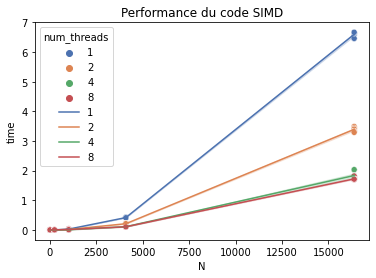

In [105]:
sns.scatterplot('N','time', data=df_part2_simd, hue='num_threads',palette="deep")
sns.lineplot(data=df_part2_simd, x="N", y="time", hue="num_threads",palette="deep")
plt.title('Performance du code SIMD')

**Comparaison des méthodes entre elles**

Désormais, nous pouvons comparer les performances des 3 méthodes utilisées dans cette partie.  

In [14]:
#on ajoute une colonne method à tous les dataframes
df_part2_seq['method'] = pd.Series(['sequentielle' for x in range(len(df_part2_seq.index))]) # adding column with constant value
df_part2_pragma['method'] = pd.Series(['pragma (reduction)' for x in range(len(df_part2_pragma.index))])
df_part2_simd['method'] = pd.Series(['simd' for x in range(len(df_part2_simd.index))]) 


Text(0.5, 1.0, 'Comparaison des 3 méthodes pour 1 coeur')

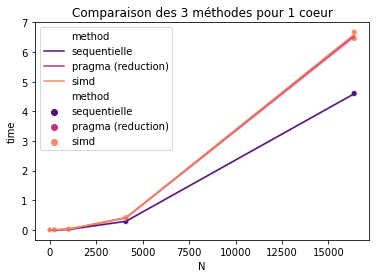

In [16]:
#on fusionne toutes les lignes des différents dataframe pour lesquelles on travaille avec 1 coeur
merged_df_1_core_part2 = df_part2_seq.loc[(df_part2_seq['num_threads']==1)] 
merged_df_1_core_part2 = merged_df_1_core_part2.append(df_part2_pragma.loc[(df_part2_pragma['num_threads']==1)])
merged_df_1_core_part2 = merged_df_1_core_part2.append(df_part2_simd.loc[(df_part2_simd['num_threads']==1)])
merged_df_1_core_part2 = merged_df_1_core_part2.reset_index()
merged_df_1_core_part2


sns.scatterplot('N','time', data=merged_df_1_core_part2, hue='method',palette="magma")
sns.lineplot(data=merged_df_1_core_part2, x="N", y="time", hue="method",palette="magma")
plt.title('Comparaison des 3 méthodes pour 1 coeur')

Text(0.5, 1.0, 'Comparaison des 3 méthodes pour 8 coeurs')

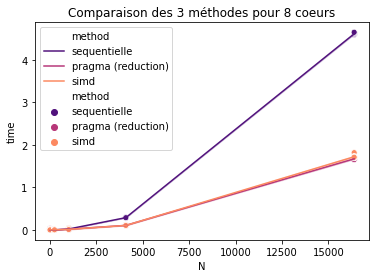

In [17]:
#on fusionne toutes les lignes des différents dataframe pour lesquelles on travaille avec 1 coeur
merged_df_8_core_part2 = df_part2_seq.loc[(df_part2_seq['num_threads']==8)] 
merged_df_8_core_part2 = merged_df_8_core_part2.append(df_part2_pragma.loc[(df_part2_pragma['num_threads']==8)])
merged_df_8_core_part2 = merged_df_8_core_part2.append(df_part2_simd.loc[(df_part2_simd['num_threads']==8)])
merged_df_8_core_part2 = merged_df_8_core_part2.reset_index()
#merged_df_8_core_part2


sns.scatterplot('N','time', data=merged_df_8_core_part2, hue='method',palette="magma")
sns.lineplot(data=merged_df_8_core_part2, x="N", y="time", hue="method",palette="magma")
plt.title('Comparaison des 3 méthodes pour 8 coeurs')

Nous remarquons qu'en utilisant 1 unique coeur, la méthode séquentielle est légèrement plus performante que la méthode reduction pour la plus grande valeur de N testée, car n'utilisant pas de code de parallélisation, la méthode séquentielle est plus rapide. Avant cela, les méthodes réduction et séquentielle présentent des résultats similaires.

En revanche, en utilisant 8 coeurs, la méthode reduction reprend le dessus par rapport à la méthode séquentielle. Nous expliquons cela grâce à toutes les explications citées au cours des deux parties de ce TP. De même SIMD présente des résultats similaires aux performances de la reduction, cela signifie que la vectorisation du pragma est adéquate. 

## Conclusion

Ce TP nous a permis de découvrir la programmation OpenMP qui permet de distribuer les tâches d'un programme à différents coeurs de calcul, le tout sur une architecture à mémoire partagée. Cette technique permet d'exploiter la puissance de calcul d'une machine en effectuant une multitude de tâches simultanément. Nous avons pu voir que les méthodes disponibles sont diverses et variées. Cependant, une méthode optmisant au maximum un algorithme n'est parfois absolument pas adaptée à un autre algorithme.
Puisque le développeur a la responsabilité d'intégrer "manuellement" les directives OpenMP dans son code, il convient de choisir minutieusement la méthode de parallélisation la plus adéquate.